# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
import numpy as np

<AxesSubplot:xlabel='Year'>

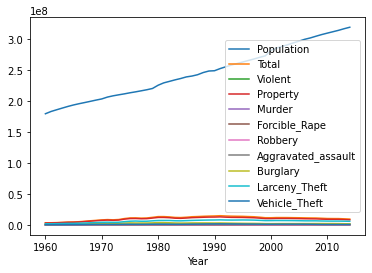

In [206]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

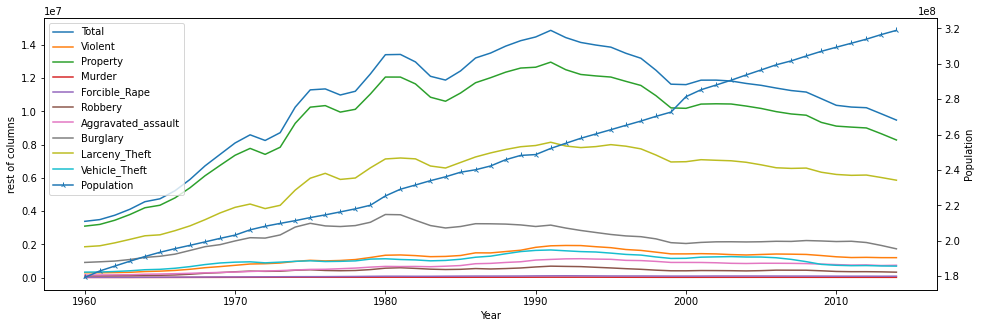

In [207]:
fig, ax = plt.subplots(figsize= (16,5))
ax.plot(df.index, df.iloc[:, 1:], label= df.iloc[:,1:].columns.tolist())
ax.set_ylabel('rest of columns')
ax.set_xlabel('Year')

ax2 = ax.twinx()
ax2.plot(df.Population, label= 'Population', marker= '2')
ax2.set_ylabel('Population')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax.legend(lines, labels, loc= 0);

<AxesSubplot:>

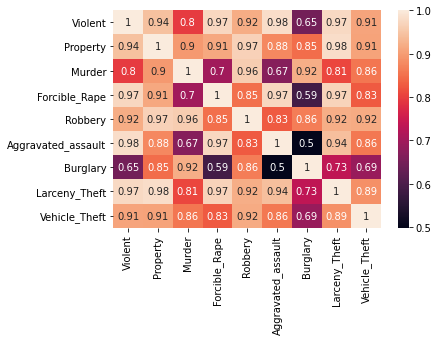

In [208]:
new_df = df.drop(['Population', 'Total'], axis= 1)
sns.heatmap(new_df.corr(), annot= True)

In [209]:
x = new_df[['Robbery', 'Burglary', 'Property', 'Vehicle_Theft', 'Larceny_Theft']]
x = np.array(x)

In [210]:
y = new_df['Murder']
y = np.array(y)

In [211]:
poly = PolynomialFeatures(6)
x_poly = poly.fit_transform(x,y)

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size= 0.2, random_state= 42)

In [213]:
linear_reg = LinearRegression(n_jobs= -1)
linear_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [214]:
kfold = RepeatedKFold(n_splits=23, n_repeats= 7, random_state=42)

In [215]:
name = 'Polynomial regression degree 6'
cv_results = model_selection.cross_val_score(linear_reg, x_train, y_train, cv=kfold)
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results)
print("----------")
print(msg)
print("----------")
print("----------")

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\si

In [216]:
val_score = []
train_score = []

Iteración: 1
train/índices batch: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43]
batch_size: 42
val_size: 2
##############
Iteración: 2
train/índices batch: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43]
batch_size: 42
val_size: 2
##############
Iteración: 3
train/índices batch: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 41 42 43]
batch_size: 42
val_size: 2
##############
Iteración: 4
train/índices batch: [ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
batch_size: 42
val_size: 2
##############
Iteración: 5
train/índices batch: [ 0  1  2  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
batch_size: 42
va

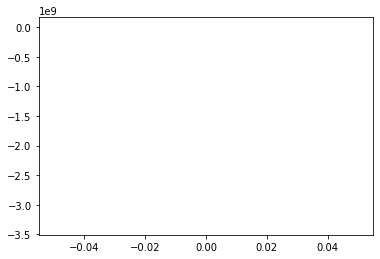

In [217]:
for i, (train, val) in enumerate(kfold.split(x_train)):
    print("Iteración:", i+1)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    #print("val:", val)
    print("val_size:", len(val))
    #print("batch:", X_train[train])

    # train the model
    x_traincv, x_valcv = x_train[train], x_train[val]
    y_traincv, y_valcv = y_train[train], y_train[val]
    linear_reg.fit(x_traincv, y_traincv)
    score_val = linear_reg.score(x_valcv, y_valcv)
    val_score.append(score_val)
    score_train = linear_reg.score(x_traincv, y_traincv)
    train_score.append(score_train)

    plt.plot(score_val, color= 'blue')
    plt.plot(score_train, color= 'red')

    print("##############")

In [218]:
linear_reg.score(x_test, y_test)

-14166.408237440895

In [219]:
dic_epoc = {}
for i in range(7):
    dic_epoc[str(i)] = [train_score[:23],val_score[:23]]
    train_score = train_score[23:]
    val_score = val_score[23:]
dic_epoc

{'0': [[0.9999999999999845,
   0.9999999999999856,
   0.9999999999999909,
   0.9999999999999847,
   0.9999999999999887,
   0.9999999999999998,
   0.9999999999999855,
   0.9999999999999775,
   0.9999999999999963,
   0.9999999999999986,
   0.9999999999999929,
   0.9999999999570317,
   0.9999999999999793,
   0.9999999999999827,
   0.9999999999999957,
   0.9999999999999996,
   0.999999999999988,
   0.9999999999999915,
   0.9999999999999947,
   0.9999999999999998,
   0.9999999999999938,
   0.9999999999999533,
   0.9999999999999906],
  [-5766.216177566927,
   -1979.153788592974,
   -76385232.80022997,
   -1868402.62589654,
   -6.592622430829015,
   0.37981642494433,
   -92301.69081643606,
   -2365.2460605257384,
   -81811.31972226083,
   -77281.97589306955,
   -4877950.248495074,
   -151.34578853904785,
   -225722.6026447739,
   -1205063.171031746,
   -198738.31593405097,
   -100614.70460451483,
   -10303.12636931889,
   -18768.502197305716,
   -2502550.3607052774,
   -1.5133437871159976,
  

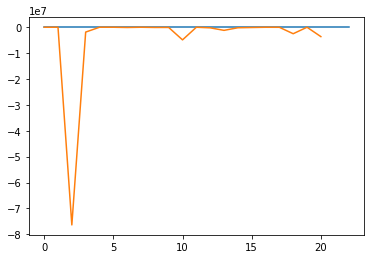

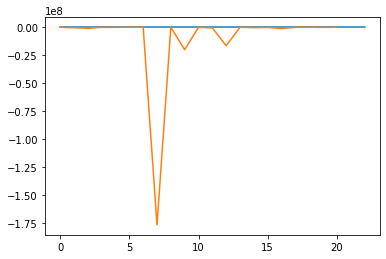

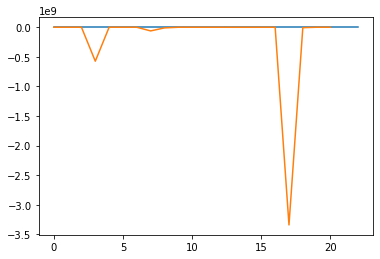

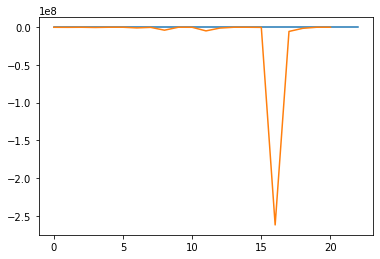

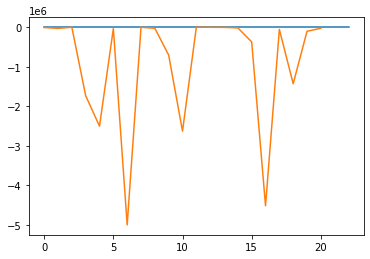

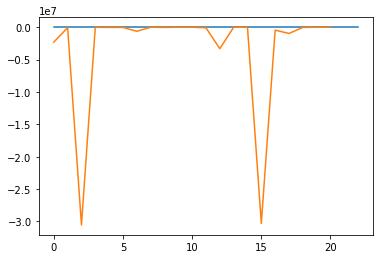

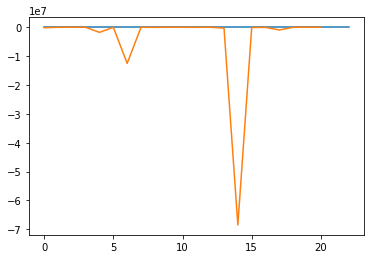

In [221]:
for key, value in dic_epoc.items():
    plt.plot(value[0])
    plt.plot(value[1])
    plt.show()